# Linear Regression Models

This section we learn about Ordinary least squares Linear Regression `LinearRegression` (from Sci-kit Learn Package) fits a linear model with coefficients $w = (w_1, ..., w_p)$ to minimize the residual sum of squares between the observed targets in the dataset, and the targets predicted by the linear approximation.

The philosophy is shown as the graph below. The coefficients or slope controls how the line rotate and the bias controls if there is any shift for the linear line. Both coefficients and bias work together to move the linear line anywhere on the Cartesian plane. 

Where do we stop? We also compute the errors and we stop when we are satisfied with the small errors. 

<p align='center'><img src='https://mlfromscratch.com/content/images/2020/06/linear_regression_gif.gif' width=500></img></p>





In [ ]:
# library
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np

## Toy Data

We will start with the most familiar linear regression, a straight-line fit to data. A straight-line fit is a model of the form
$$y = ax + b$$
where $a$ is commonly known as the *slope*, and $b$ is commonly known as the *intercept*.

Consider the following data, which is scattered about a line with a slope of 2 and an intercept of -5:

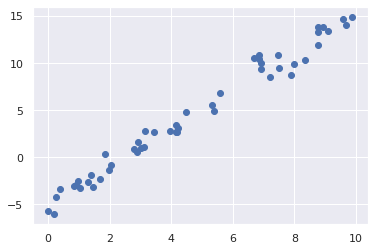

In [ ]:
# create toy data
rng = np.random.RandomState(1)
x = 10 * rng.rand(50)
y = 2 * x - 5 + rng.randn(50)
plt.scatter(x, y);

We can use Scikit-Learn's ``LinearRegression`` estimator to fit this data and construct the best-fit line:

In [ ]:
# library
from sklearn.linear_model import LinearRegression

In [ ]:
# create model
model = LinearRegression(fit_intercept=True)

# train/fit model
model.fit(x[:, np.newaxis], y)

LinearRegression()

In [ ]:
# create fake x data
xfit = np.linspace(0, 10, 1000)

# use fake x data to predict some estimates of y
yfit = model.predict(xfit[:, np.newaxis])

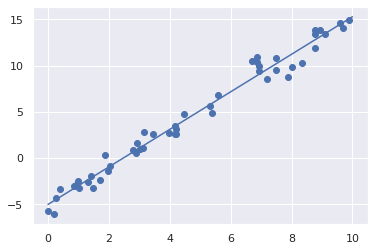

In [ ]:
# plot the prediction and the ground truth
plt.scatter(x, y)
plt.plot(xfit, yfit);

In [ ]:
# print results
print("Model slope:    ", model.coef_[0])
print("Model intercept:", model.intercept_)

Model slope:     2.0272088103606953
Model intercept: -4.998577085553204


### Basis Function Regression

One trick you can use to adapt linear regression to nonlinear relationships between variables is to transform the data according to *basis functions*.
We have seen one version of this before, in the ``PolynomialRegression`` pipeline used in hyperparameters and model validation and feature engineering. The idea is to take our multidimensional linear model:
$$
y = a_0 + a_1 x_1 + a_2 x_2 + a_3 x_3 + \cdots
$$
and build the $x_1, x_2, x_3,$ and so on, from our single-dimensional input $x$.
That is, we let $x_n = f_n(x)$, where $f_n()$ is some function that transforms our data.

For example, if $f_n(x) = x^n$, our model becomes a polynomial regression:
$$
y = a_0 + a_1 x + a_2 x^2 + a_3 x^3 + \cdots
$$
Notice that this is *still a linear model*—the linearity refers to the fact that the coefficients $a_n$ never multiply or divide each other.
What we have effectively done is taken our one-dimensional $x$ values and projected them into a higher dimension, so that a linear fit can fit more complicated relationships between $x$ and $y$.

### Polynomial basis functions

This polynomial projection is useful enough that it is built into Scikit-Learn, using the ``PolynomialFeatures`` transformer:

In [ ]:
# library
from sklearn.preprocessing import PolynomialFeatures

How to use polynomial features?

In [ ]:
# create some fake data
x = np.array([2, 3, 4])

# use PolynomialFeatures() function
poly = PolynomialFeatures(3, include_bias=False)

# fit the data using poly function
poly.fit_transform(x[:, None])

array([[ 2.,  4.,  8.],
       [ 3.,  9., 27.],
       [ 4., 16., 64.]])

We see here that the transformer has converted our one-dimensional array into a three-dimensional array by taking the exponent of each value.
This new, higher-dimensional data representation can then be plugged into a linear regression.

Let's make a 7th-degree polynomial model in this way:

In [ ]:
# import make_pipeline
from sklearn.pipeline import make_pipeline

In [ ]:
# create pipeline
poly_model = make_pipeline(PolynomialFeatures(7), LinearRegression())

In [ ]:
# what is it
poly_model

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=7)),
                ('linearregression', LinearRegression())])

The slope and intercept of the data are contained in the model's fit parameters, which in Scikit-Learn are always marked by a trailing underscore.
Here the relevant parameters are ``coef_`` and ``intercept_``:

In [ ]:
# np.newaxis to create a column
# we use this below to create data
x[:,].shape, x[:, np.newaxis].shape

((50,), (50, 1))

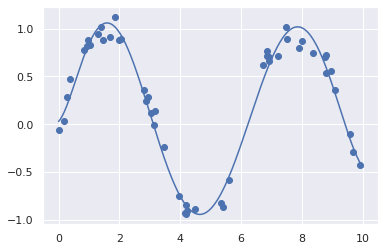

In [ ]:
# create toy data
rng = np.random.RandomState(1)
x = 10 * rng.rand(50)
y = np.sin(x) + 0.1 * rng.randn(50)

# fit the model
poly_model.fit(x[:, np.newaxis], y)

# make predictions
yfit = poly_model.predict(xfit[:, np.newaxis])

# plot the predictions and the truth
plt.scatter(x, y)
plt.plot(xfit, yfit);

Our linear model, through the use of 7th-order polynomial basis functions, can provide an excellent fit to this non-linear data!

But how do we measure that it's a "excellent fit"? We can refer to Sci-kit Learn package `model_valuation` library. Here is the [API](https://scikit-learn.org/stable/modules/model_evaluation.html). Please click on the link to check it out. For this tutorial, we will use a few famous ones: `r2_score`, `mean_absolute_error`

In [ ]:
# make sure we know what we are comparing 
ground_truth = y
prediction = poly_model.predict(x[:, np.newaxis])

In [ ]:
# library
from sklearn.metrics import r2_score

The `r2 score` or $R^2$ computes the coefficient of determination. It represents the proportion of variance of $Y$ that has been explained by the independent variables in the model. It provides an indication of goodness of fit and therefore a measure of how well unseen samples are likely to be predicted by the model, through the proportion of explained variance.

If $\hat{y}_i$ is the predicted value of the $i$-th sample and $y_i$ is the corresponding true value for total $n$ samples, the estimated $R^2$ is defined as 
$$R^2(y, \hat{y}) = 1 - \frac{\sum_{i=1}^n (y_i - \hat{y}_i)^2}{\sum_{i=1}^n (y_i - \bar{y})^2}$$
where $\bar{y} = \frac{1}{n} \sum_{i=1}^n y_i$ and $\sum_{i=1}^n (y_i - \hat{y}_i) = \sum_{i=1}^n \epsilon_i^2$.

In [ ]:
# compute r2 score
r2_score(y_true=ground_truth, y_pred=prediction)

0.9760274753833529

In [ ]:
# library
from sklearn.metrics import mean_absolute_error

Mean absolute error is a risk metric corresponding to the expected value of the absolute error loss of $l1$-norm loss. If $\hat{y}_i$ is the predictedvalue of the $i$-th sample, and $y_i$ is the corresponding true value, then the mean absolute error (MAE) estimated over $n_{\text{samples}}$ is defined as

$$\text{MAE}(y, \hat{y}) = \frac{1}{n_{\text{samples}}} \sum_{i=0}^{n_{\text{samples}} - 1} |y_i - \hat{y}_i| $$


In [ ]:
# compute mae
mean_absolute_error(y_true=ground_truth, y_pred=prediction)

0.08377464631637603

In [ ]:
# library
from sklearn.metrics import mean_squared_error

The Mean Square Error is a risk metric corresponding to the expected value of the squared (quadratic) error or loss. If $\hat{y}_i$ is the predictedvalue of the $i$-th sample, and $y_i$ is the corresponding true value, then the mean squared error (MSE) estimated over $n_{\text{samples}}$ is defined as 
$$\text{MSE}(y, \hat{y}) = \frac{1}{n_{\text{samples}}} \sum_{i=0}^{n_{\text{samples}}-1} (y_i - \hat{y}_i)^2$$

In [ ]:
# compute mse
mean_squared_error(y_true=ground_truth, y_pred=prediction)

0.009901995594301508

In [ ]:
# import
from sklearn.metrics import mean_absolute_percentage_error

The mean absolute percentage error (MAPE), also known as mean absolute percentage deviation (MAPD), is an evaluation metric for regression problems. The idea of this metric is to be sensitive to relative errors. It is for example not changed by a global scaling of the target variable. If $\hat{y}_i$ is the predictedvalue of the $i$-th sample, and $y_i$ is the corresponding true value, then the mean absolute percentage error (MAPE) estimated over $n_{\text{samples}}$ is defined as 
$$\text{MAPE}(y, \hat{y}) = \frac{1}{n_{\text{samples}}} \sum_{i=0}^{n_{\text{samples}} - 1} \frac{|y_i - \hat{y}_i|}{\max(\epsilon, |y_i|)}$$

In [ ]:
# compute mape
mean_absolute_percentage_error(y_true=ground_truth, y_pred=prediction)

0.24650383522511843

## California Housing Data

Please make sure you are connected to Colab. Then please click on the folder button on the left menu bar. You will see a folder called `sample_data`. If you click the dropdown button for this folder, you will se a data called `california_housing_train.csv` and `california_housing_test.csv`. We will be using this data as an example.

If you want to use custom data, you need to upload to the virtual machine. This means you click on the "upload" button (this is the box with an uparrow inside) and upload the file from your desktop/laptop.

In [ ]:
# library
import pandas as pd

In [ ]:
# read training data
housing_train = pd.read_csv('sample_data/california_housing_train.csv')

In [ ]:
# read test data
housing_test = pd.read_csv('sample_data/california_housing_test.csv')

In [ ]:
# display dimension
housing_train.shape, housing_test.shape

((17000, 9), (3000, 9))

In [ ]:
# display top rows
housing_train.head(3)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0


In [ ]:
# display top rows
housing_test.head(3)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.05,37.37,27.0,3885.0,661.0,1537.0,606.0,6.6085,344700.0
1,-118.30,34.26,43.0,1510.0,310.0,809.0,277.0,3.5990,176500.0
2,-117.81,33.78,27.0,3589.0,507.0,1484.0,495.0,5.7934,270500.0


# Univariate Linear Model

Simple Linear Regression: We will start with the most familiar linear regression, a straight-line fit to data. A straight-line fit is a model of the form
$$
y = ax + b
$$
where $a$ is commonly known as the *slope*, and $b$ is commonly known as the *intercept*.

## Define Task

The definition of machine learning task requires us to define the explanatory variables $X$ and the target variable $Y$. This is extremely crucial! Without these definitions, we cannot set up a machine learning problem clearly. We use $X$ to denote explanatory variables (sometimes also known as features). We use $Y$ to denote target variable (sometimes also known as response variable).

We also split traininig and test set. The model is trained on the training set and the test set is never touched until the end. This way we do not cheat and we produce honest result using the test set (the set that the model has not yet seen before). 

For the first introductory task, we use `median_income` to predict `median_house_value`. Hence the model we are trying to build is
$$\text{median_house_value} = \beta_0 + \beta_1 \text{median_income}$$

In [ ]:
# define target and explanatory variables
# aka define X (feaures or explanatory variables) and Y (target/response)
x_train = housing_train['median_income']
y_train = housing_train['median_house_value']

In [ ]:
# define X and Y for test set
x_test = housing_test['median_income']
y_test = housing_test['median_house_value']

In [ ]:
# display dimensions for X
# do this for both training and test set
x_train.shape, x_test.shape

((17000,), (3000,))

## Normalize

In [ ]:
# normalize
x_train = (x_train - x_train.mean())/x_train.std()
x_test = (x_test - x_test.mean())/x_test.std()

In [ ]:
# normalize
y_train = (y_train - y_train.mean())/y_train.std()
y_test = (y_test - y_test.mean())/y_test.std()

## Use Scipy Model

In [ ]:
# install
!pip install scipy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# library
import scipy
# from scipy import stats

In [ ]:
# define X and y
# single linear regression
x_train.shape, y_train.shape

((17000,), (17000,))

In [ ]:
# model: univariate linear regression
slope, intercept, r, p, se = scipy.stats.linregress(x=x_train, y=y_train)

In [ ]:
# import
import numpy as np

In [ ]:
print('Linear model: Median House Value = ' + str(np.round(intercept, 3)) + ' + ' + str(np.round(slope, 3)) + '*Median Income')

Linear model: Median House Value = 0.0 + 0.692*Median Income


In [ ]:
print('Pearson correlation = ' + str(np.round(r, 3)))

Pearson correlation = 0.692


In [ ]:
print('p-value = ' + str(np.round(p, 3)))

p-value = 0.0


In [ ]:
print('standard error for the coefficient = ' + str(np.round(se, 3)))

standard error for the coefficient = 0.006


In [ ]:
# errors
np.mean(np.abs(y_test - slope*x_test))

0.552877278806694

## Use Tensorflow Model

In [ ]:
# library
import tensorflow as tf

In [ ]:
# use sequential API
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(1, input_shape=[1]))

In [ ]:
# compile
opt = tf.keras.optimizers.SGD(learning_rate=0.1)
model.compile(optimizer=opt, loss='mae')

In [ ]:
# train
history = model.fit(x_train, y_train, epochs=30, validation_split=.2)

Epoch 1/30
425/425 [==============================] - 1s 2ms/step - loss: 0.5488 - val_loss: 0.6566
Epoch 2/30
425/425 [==============================] - 1s 2ms/step - loss: 0.4994 - val_loss: 0.6592
Epoch 3/30
425/425 [==============================] - 1s 2ms/step - loss: 0.5000 - val_loss: 0.6460
Epoch 4/30
425/425 [==============================] - 1s 2ms/step - loss: 0.5003 - val_loss: 0.6433
Epoch 5/30
425/425 [==============================] - 1s 2ms/step - loss: 0.4992 - val_loss: 0.6688
Epoch 6/30
425/425 [==============================] - 1s 3ms/step - loss: 0.5005 - val_loss: 0.6434
Epoch 7/30
425/425 [==============================] - 2s 5ms/step - loss: 0.4996 - val_loss: 0.6544
Epoch 8/30
425/425 [==============================] - 1s 2ms/step - loss: 0.4996 - val_loss: 0.6663
Epoch 9/30
425/425 [==============================] - 1s 2ms/step - loss: 0.5004 - val_loss: 0.6611
Epoch 10/30
425/425 [==============================] - 1s 2ms/step - loss: 0.5001 - val_loss: 0.6481

In [ ]:
# library for plots
import matplotlib.pyplot as plt

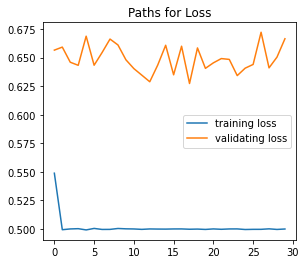

In [ ]:
# plot
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training loss', 'validating loss'])
plt.title('Paths for Loss')
plt.show()

In [ ]:
# evaluate
model.evaluate(x_test, y_test)

94/94 [==============================] - 0s 1ms/step - loss: 0.5479


0.5478752255439758

# Multiple Linear Regression Model

## Buid Data

In [ ]:
# define target and explanatory variables
# aka define X (feaures or explanatory variables) and Y (target/response)
x_train = housing_train.iloc[:, 0:7]
y_train = housing_train['median_house_value']

In [ ]:
# define X and Y for test set
x_test = housing_test.iloc[:, 0:7]
y_test = housing_test['median_house_value']

In [ ]:
# display dimensions for X
# do this for both training and test set
x_train.shape, x_test.shape

((17000, 7), (3000, 7))

## Normalize

In [ ]:
# normalize
x_train = (x_train - x_train.mean())/x_train.std()
x_test = (x_test - x_test.mean())/x_test.std()

In [ ]:
# normalize
y_train = (y_train - y_train.mean())/y_train.std()
y_test = (y_test - y_test.mean())/y_test.std()

## Use Tensorflow Model

In [ ]:
# library
import tensorflow as tf

In [ ]:
# use sequential API
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(1, input_shape=[7]))

In [ ]:
# compile
opt = tf.keras.optimizers.SGD(learning_rate=0.1)
model.compile(optimizer=opt, loss='mae')

In [ ]:
# train
history = model.fit(x_train, y_train, epochs=50, validation_split=.2)

Epoch 1/50
425/425 [==============================] - 1s 2ms/step - loss: 0.5858 - val_loss: 0.7030
Epoch 2/50
425/425 [==============================] - 1s 2ms/step - loss: 0.5585 - val_loss: 0.7226
Epoch 3/50
425/425 [==============================] - 1s 2ms/step - loss: 0.5555 - val_loss: 0.7033
Epoch 4/50
425/425 [==============================] - 1s 1ms/step - loss: 0.5567 - val_loss: 0.7149
Epoch 5/50
425/425 [==============================] - 1s 2ms/step - loss: 0.5551 - val_loss: 0.7102
Epoch 6/50
425/425 [==============================] - 1s 1ms/step - loss: 0.5561 - val_loss: 0.7016
Epoch 7/50
425/425 [==============================] - 1s 1ms/step - loss: 0.5547 - val_loss: 0.7080
Epoch 8/50
425/425 [==============================] - 1s 1ms/step - loss: 0.5548 - val_loss: 0.7046
Epoch 9/50
425/425 [==============================] - 1s 2ms/step - loss: 0.5551 - val_loss: 0.7076
Epoch 10/50
425/425 [==============================] - 1s 2ms/step - loss: 0.5557 - val_loss: 0.7095

In [ ]:
# library for plots
import matplotlib.pyplot as plt

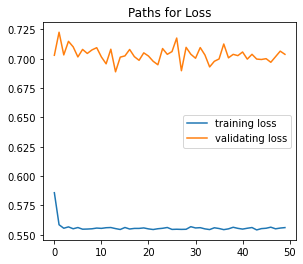

In [ ]:
# plot
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training loss', 'validating loss'])
plt.title('Paths for Loss')
plt.show()

In [ ]:
# evaluate
model.evaluate(x_test, y_test)

94/94 [==============================] - 0s 1ms/step - loss: 0.5839


0.5838882923126221

## Deeper Model

## Use Tensorflow Model

In [ ]:
# use sequential API
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(128, input_shape=[7]))
model.add(tf.keras.layers.Dense(64))
model.add(tf.keras.layers.Dense(1))

In [ ]:
# compile
opt = tf.keras.optimizers.SGD(learning_rate=0.1)
model.compile(optimizer=opt, loss='mae')

In [ ]:
# train
history = model.fit(x_train, y_train, epochs=50, validation_split=.2)

Epoch 1/50
425/425 [==============================] - 1s 2ms/step - loss: 0.5901 - val_loss: 0.7154
Epoch 2/50
425/425 [==============================] - 1s 2ms/step - loss: 0.5601 - val_loss: 0.6940
Epoch 3/50
425/425 [==============================] - 1s 2ms/step - loss: 0.5581 - val_loss: 0.7276
Epoch 4/50
425/425 [==============================] - 1s 2ms/step - loss: 0.5567 - val_loss: 0.7003
Epoch 5/50
425/425 [==============================] - 1s 2ms/step - loss: 0.5565 - val_loss: 0.7082
Epoch 6/50
425/425 [==============================] - 1s 2ms/step - loss: 0.5566 - val_loss: 0.7006
Epoch 7/50
425/425 [==============================] - 1s 2ms/step - loss: 0.5544 - val_loss: 0.6920
Epoch 8/50
425/425 [==============================] - 1s 2ms/step - loss: 0.5537 - val_loss: 0.7107
Epoch 9/50
425/425 [==============================] - 1s 2ms/step - loss: 0.5539 - val_loss: 0.7143
Epoch 10/50
425/425 [==============================] - 1s 2ms/step - loss: 0.5540 - val_loss: 0.6894

In [ ]:
# library for plots
import matplotlib.pyplot as plt

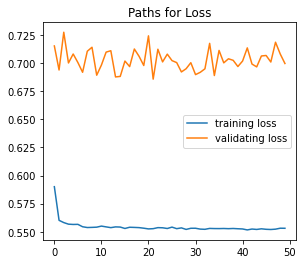

In [ ]:
# plot
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training loss', 'validating loss'])
plt.title('Paths for Loss')
plt.show()

In [ ]:
# evaluate
model.evaluate(x_test, y_test)

94/94 [==============================] - 0s 1ms/step - loss: 0.5809


0.580912172794342

Let us conclude the results.

| Model | Reuslt |
| ---   | ---    |
| Uni. Linear Reg (Scipy) | 0.55 |
| Uni. Linear Reg (TF)    | 0.54 |
| Multiple Linear Reg (TF) | 0.58 |
| Multiple Linear Reg (TF): 3 layers | 0.57 |